## Function

In [1]:
from math import sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def one_particle(x0, y0, mux, muy, b4):
    """ calculate one particle stability """
    px0 = 0.0; py0 = 0.0;

    for n in range(10001):
        #print('{:3} {:+19.16f} {:+19.16f} {:+19.16f}'.format(n, x0, y0, x0*x0 + y0*y0))
        if (x0*x0 + y0*y0) < 1.0:
            x1  =  x0 * cos(2.0*pi*mux) + px0 * sin(2.0*pi*mux);
            px1 = -x0 * sin(2.0*pi*mux) + px0 * cos(2.0*pi*mux);
            y1  =  y0 * cos(2.0*pi*muy) + py0 * sin(2.0*pi*muy);
            py1 = -y0 * sin(2.0*pi*muy) + py0 * cos(2.0*pi*muy);
            px2 = px1 + b4 * (x1*x1*x1 - 3.0*x1*y1*y1);
            py2 = py1 - b4 * (y1*y1*y1 - 3.0*x1*x1*y1);
            x0  =  x1;  y0 =  y1;
            px0 = px2; py0 = py2;
        else:
            return (n-1)
    
    return n

def calculate(X, Y, upper, delta, mux, muy, b4):
    """ calculate in a I Quadrant"""

    Z = np.zeros(( upper+1, upper+1 ))
    for y in Y.T[:1][0]:
        for x in X[:1][0]:

            x0 = x*delta
            y0 = y*delta
            in_circle = 1 if ((x0*x0 + y0*y0) < 1.0) else 0

            if (in_circle == 1):
                n = one_particle(x0, y0, mux, muy, b4)
                Z[y][x] = int(n)
                
            #print(x, y, Z[x][y])
    
    return Z

## Main

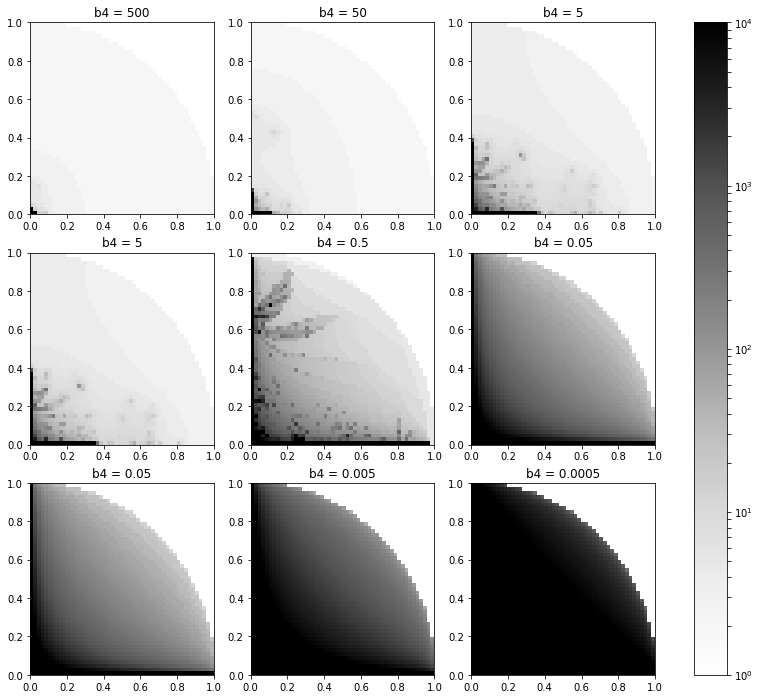

In [2]:
# parameters
mux = 0.32;
muy = 0.32;
upper = 50
delta = 1.0 / upper
b4  = [500, 50, 5, 0.5, 0.05, 0.005, 0.0005, 0.00005, 0.000005]

# initialization X, Y mesh
X = np.arange(0, upper+1)
Y = np.arange(0, upper+1)
X, Y = np.meshgrid(X, Y)

# calculate and plot for a different b4
fig, ax = plt.subplots(3, 3, figsize=(14,12))
for i in range(3):
    for j in range(3):
        Z = calculate(X, Y, upper, delta, mux, muy, b4[2*i + j]) + 1
        sub = ax[i][j].pcolor(X*delta, Y*delta, Z, cmap='Greys', norm=colors.LogNorm(vmin=1.0, vmax=Z.max()))
        ax[i][j].set_title("b4 = {}".format(b4[2*i + j]))
    
fig.colorbar(sub, ax=ax)
plt.show()